In [1]:
import pathlib
import os

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/archive.zip'
import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

In [ ]:
data_dir = pathlib.Path('/content/datasets/AMHCD_64/AMHCD_64')
print("Le répertoire de données : {} ".format(data_dir))

Le répertoire de données : /content/datasets/AMHCD_64/AMHCD_64 


In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print("Nombre des images de la base de données : {} ".format(image_count))

Nombre des images de la base de données : 25740 


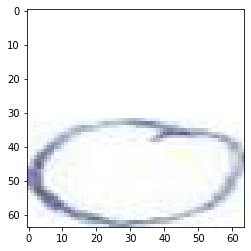

In [ ]:
#Exemple d'une image
image = plt.imread("/content/datasets/AMHCD_64/AMHCD_64/ya/ya_1.jpeg")
plt.imshow(image)

In [ ]:
#Dimension des image
image.shape

(64, 64, 3)

In [ ]:
#Taille des images
img_height = 32
img_width = 32

In [ ]:
# train_data est un objet tensor, chaque élement est un tuple (image,label) 
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=1,
  )


Found 25740 files belonging to 33 classes.
Using 20592 files for training.


In [ ]:
# val_data est un objet tensor, chaque élement est un tuple (image,label) 
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  #batch_size=batch_size,
  )

Found 25740 files belonging to 33 classes.
Using 5148 files for validation.


In [ ]:
class_names = val_data.class_names
print("Les classes :")
print(class_names)
print("Nombre de classe : {} ".format(len(class_names)))

Les classes :
['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh', 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan', 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax', 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
Nombre de classe : 33 


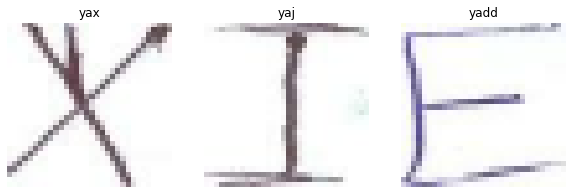

In [ ]:
#Visualiser qlq données
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = 33

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(32, 32, 3)),

    layers.Conv2D(32,(3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),

    layers.Conv2D(64,(3,3), padding='same',activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),
    
    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,
                                                   histogram_freq=1, 
                                                   write_images=logdir,
                                                   embeddings_data=train_data)


historique = model.fit( 
             train_data,
             validation_data=val_data,
             epochs=40,
             callbacks=[tensorboard_callback]
)

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


644/644 [==============================] - 18s 15ms/step - loss: 1.3304 - accuracy: 0.6328 - val_loss: 0.2145 - val_accuracy: 0.9394
Epoch 2/40
644/644 [==============================] - 16s 25ms/step - loss: 0.2099 - accuracy: 0.9391 - val_loss: 0.0922 - val_accuracy: 0.9718
Epoch 3/40
644/644 [==============================] - 12s 18ms/step - loss: 0.1249 - accuracy: 0.9628 - val_loss: 0.0621 - val_accuracy: 0.9839
Epoch 4/40
644/644 [==============================] - 13s 20ms/step - loss: 0.0950 - accuracy: 0.9722 - val_loss: 0.0525 - val_accuracy: 0.9860
Epoch 5/40
644/644 [==============================] - 11s 18ms/step - loss: 0.0752 - accuracy: 0.9776 - val_loss: 0.0567 - val_accuracy: 0.9850
Epoch 6/40
644/644 [==============================] - 13s 20ms/step - loss: 0.0688 - accuracy: 0.9801 - val_loss: 0.0448 - val_accuracy: 0.9893
Epoch 7/40
644/644 [==============================] - 21s 32ms/step - loss: 0.0620 - accuracy: 0.9813 - val_loss: 0.0451 - val_accuracy: 0.9895
Epo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

In [ ]:
import pandas as pd
metrics = pd.DataFrame(historique.history)

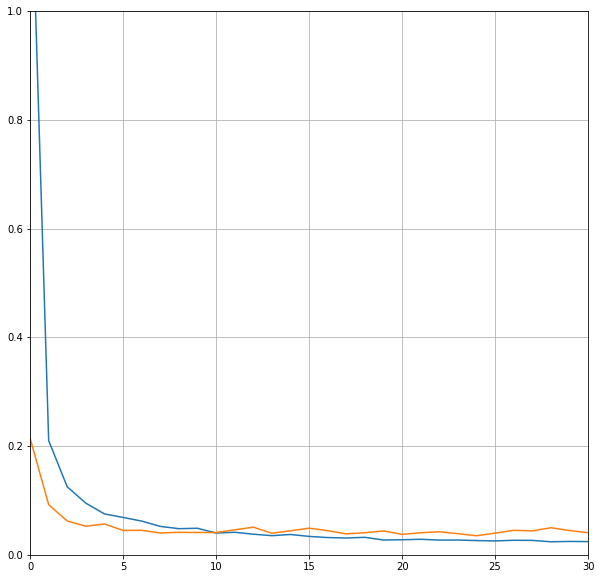

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["loss","val_loss"]])
plt.grid(True)
plt.show()

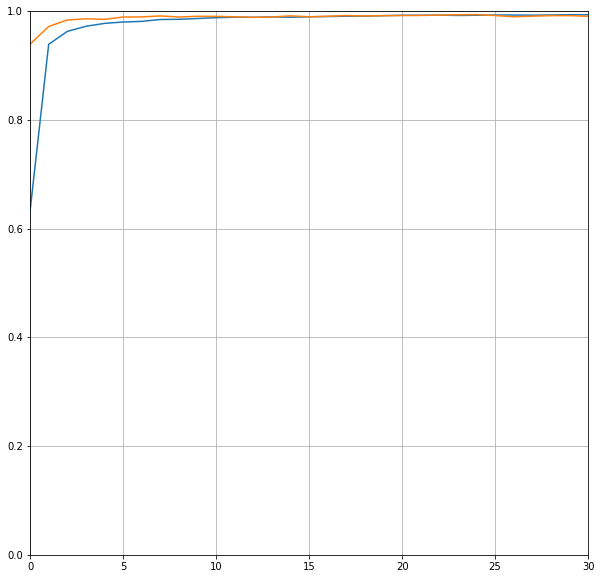

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim([0,1])
plt.xlim([0,30])
plt.plot(metrics[["accuracy","val_accuracy"]])
plt.grid(True)
plt.show()

In [ ]:
  #model.save('/content/drive/MyDrive/models(mini-projet-ml)/cnn_model1.h5')


In [ ]:
#--------------------------------------------------------------------------------------------------------------